<a href="https://colab.research.google.com/github/Mark-Nemat/Election-Date-Project/blob/master/Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

[0 1 2]


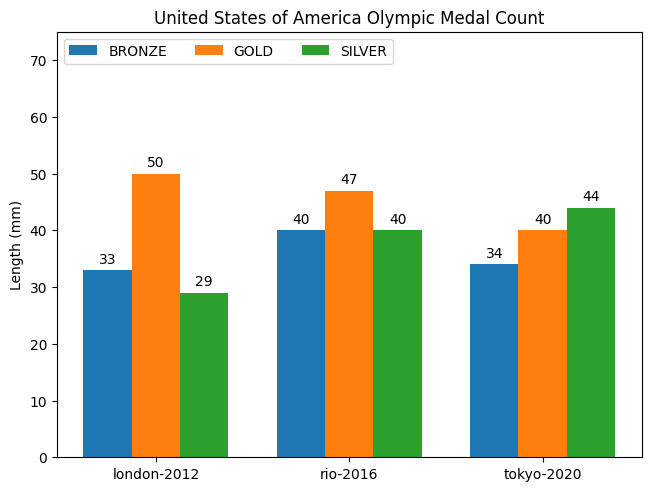

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data (replace 'olympic_medals.csv' with the actual file path)
df = pd.read_csv('olympic_medals[1].csv')

df_usa = df[(df['country_name'] == 'United States of America') &
            (df['slug_game'].isin(['tokyo-2020', 'rio-2016', 'london-2012']))]

medal_counts = df_usa.groupby(['slug_game', 'medal_type']).size().unstack(fill_value=0)


games = []
for row in medal_counts.iterrows():
    games.append(row[0])

width = 0.25  # the width of the bars
multiplier = 0
x = np.arange(len(games))
print(x)  # the label locations

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in medal_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('United States of America Olympic Medal Count')
ax.set_xticks(x + width, games)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 75)

plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load your cleaned dataset
df = pd.read_csv('olympic_medals[1].csv')
print(df.columns)

# Ensure df has columns: 'Country', 'Gold', 'Silver', 'Bronze'
# Filter for United States
us_medals = df[df['country_name'] == 'United States of America']

# Calculate Total Gold Medals
# Use .loc to index 'us_medals' with the boolean Series and select the 'medal_type' column
total_gold_medals = us_medals.loc[us_medals['medal_type'] == 'GOLD', 'medal_type'].count()
print(total_gold_medals)

# Assuming you have a dataset with the number of events per year
# Load events data (this should be a dataset with columns 'Year', 'Country', 'Total_Events')
events_data_path = 'olympic_medals[1].csv'
events_df = pd.read_csv(events_data_path)

# Filter for United States
us_events = events_df[events_df['country_name'] == 'United States of America']

# Calculate Total Events - count the number of rows instead of summing strings
total_events = len(us_events) # Changed this line to count events

# Calculate Probability
probability_gold = total_gold_medals / total_events
print(f"Probability of the US winning a gold medal in any event: {probability_gold:.4f}")

# Calculate 95% Confidence Interval for the proportion
# Using the formula for proportion confidence interval: p ± Z * sqrt(p(1-p)/n)
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_score * np.sqrt((probability_gold * (1 - probability_gold)) / total_events)
confidence_interval = (probability_gold - margin_of_error, probability_gold + margin_of_error)
print(f"95% Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")



Index(['discipline_title', 'slug_game', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')
1222
Probability of the US winning a gold medal in any event: 0.3950
95% Confidence Interval: (0.3777, 0.4122)


'\nimport pandas as pd\nimport scipy.stats as stats\nimport numpy as np\n\n# Load your cleaned dataset\ndf = pd.read_csv(\'olympic_medals[1].csv\')\nprint(df.columns)\n\n# Ensure df has columns: \'Country\', \'Gold\', \'Silver\', \'Bronze\'\n# Filter for United States\nus_medals = df[df[\'country_name\'] == \'United States of America\']\n\n# Calculate Total Gold Medals\n# Use .loc to index \'us_medals\' with the boolean Series and select the \'medal_type\' column\ntotal_gold_medals = us_medals.loc[us_medals[\'medal_type\'] == \'GOLD\', \'medal_type\'].count()\nprint(total_gold_medals)\n\n# Assuming you have a dataset with the number of events per year\n# Load events data (this should be a dataset with columns \'Year\', \'Country\', \'Total_Events\')\nevents_data_path = \'olympic_medals[1].csv\'\nevents_df = pd.read_csv(events_data_path)\n\n# Filter for United States\nus_events = events_df[events_df[\'country_name\'] == \'United States of America\']\n\n# Calculate Total Events\ntotal_ev

In [ ]:
'''
Hello Progressive Analytics Progressional Group.
My name is Mark Nemat and I'm a Property Claims Adjuster for Content & Renters.
I aspire to transition my career into the analystics department,
because I have a passion for finding creative and
innovative solutions to real world problems.
I chose to participate in this challange because I enjoy watching the Olympics,
it's interesting and fan project,
and I want to showcase a few my analystical skills.
I first wanted to calculate how many Gold, Silver, and Bronze Medals
the United States won in the past 3 Olympics.
I only choose the past three Olympics because
the I wanted a small sample size to make my prediction.
New athletes consitantely represent their country
and new sports are added to the Olympics.
The average Gold medals won by the United State of America
in the past three olympics, is 45.66 gold medals.
Since I notice the gold medal count has been
decending from the past three olympics,
I'll round down and guess the United States of America will win
45 Gold Medals in the 2024 Paris Olympics.
'''
